In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
%cd "/content/drive/MyDrive/IA/IA 2/Pruebas"
!ls

/content/drive/MyDrive/IA/IA 2/Pruebas
 Examples   images  'Load model.ipynb'	 model.ipynb   poke.h5


In [37]:
import matplotlib.pyplot as plt
import numpy as np
import os

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

# We put the separated folders into variables

In [38]:
train_path = 'images/train'
validation_path = 'images/valid'
test_path = 'images/test'

# We put the separated folders into variables

As you can see, ImageDataGenerator is being used to generate data. It is observed that different data augmentation features are used, including:

- rotation_range: This is a value in degrees (0-180), a range within which images can be randomly rotated.
- width_shift_range: This is a range (as a fraction of the total height or width) within which images can be randomly shifted vertically or horizontally.
- height_shift_range: This is a range (as a fraction of the total height or width) within which images can be randomly shifted vertically or horizontally.
- shear_range: This is a range for applying random shear.
- zoom_range: This is a range for applying random zoom.
- horizontal_flip: This is a Boolean value for randomly flipping horizontally.
- fill_mode: This is the strategy used to fill newly created pixels, which may appear after a rotation or a width/height change.

Finally, a pre-training is done with VGG16.

In [ ]:
# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(200, 200),
    batch_size=40, #20
    class_mode='categorical'
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_generator = val_datagen.flow_from_directory(
    validation_path,
    target_size=(200, 200),
    batch_size=40,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(200, 200),
    batch_size=40,
    class_mode='categorical'
)

# Load VGG16 base model
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))


Found 4851 images belonging to 3 classes.
Found 1567 images belonging to 3 classes.
Found 1009 images belonging to 3 classes.


# Model Creation

After using VGG16, two dense layers are used, the first with 512 neurons and the second with 1 neuron, the first dense layer uses the relu activation function and the second dense layer uses the same activation but with fewer neurons.
Normalization layers were also used to prevent overfitting.

In [40]:
from tensorflow.keras.layers import BatchNormalization
# model1 = models.Sequential()
# model1.add(conv_base)
# model1.add(layers.Flatten())
# model1.add(layers.Dense(256, activation='relu'))
# model1.add(BatchNormalization())
# model1.add(layers.Dropout(0.5))
# model1.add(layers.Dense(3, activation='softmax'))

model1 = models.Sequential()
model1.add(conv_base)
model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation='relu'))
model1.add(BatchNormalization())
# model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(256, activation='relu'))
model1.add(BatchNormalization())
# model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(3, activation='softmax'))

conv_base.trainable = False

model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 18432)             0         
                                                                 
 dense_9 (Dense)             (None, 512)               9437696   
                                                                 
 batch_normalization_6 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_7 (Bat  (None, 256)               1024      
 chNormalization)                                     

# Compiling the model
Here the model is compiled, using the Adam optimizer, the loss function categorical_crossentropy, and the accuracy metric.

The loss function categorical_crossentropy is used for multi-class classification problems.

In [41]:
model1.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['acc'])

# Training the model
The model is trained for 30 epochs

In [42]:
history = model1.fit(train_generator,
                     steps_per_epoch=25,
                     epochs=30,
                     validation_data=val_generator,
                     validation_steps=25)


Epoch 1/25
30/30 [==============================] - 79s 2s/step - loss: 0.8354 - acc: 0.7100 - val_loss: 1.0023 - val_acc: 0.6483
Epoch 2/25
30/30 [==============================] - 66s 2s/step - loss: 0.5473 - acc: 0.7800 - val_loss: 0.8710 - val_acc: 0.7108
Epoch 3/25
30/30 [==============================] - 48s 2s/step - loss: 0.5166 - acc: 0.7950 - val_loss: 0.9329 - val_acc: 0.7025
Epoch 4/25
30/30 [==============================] - 50s 2s/step - loss: 0.4397 - acc: 0.8275 - val_loss: 0.5815 - val_acc: 0.7917
Epoch 5/25
30/30 [==============================] - 46s 2s/step - loss: 0.4979 - acc: 0.8087 - val_loss: 0.7170 - val_acc: 0.7492
Epoch 6/25
30/30 [==============================] - 48s 2s/step - loss: 0.4113 - acc: 0.8360 - val_loss: 0.5134 - val_acc: 0.8025
Epoch 7/25
30/30 [==============================] - 48s 2s/step - loss: 0.3695 - acc: 0.8475 - val_loss: 0.5963 - val_acc: 0.7825
Epoch 8/25
30/30 [==============================] - 50s 2s/step - loss: 0.4506 - acc: 0.81

In [43]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [44]:
epochs = range(1, len(acc) + 1)

# Results

Here we load the saved model and make predictions on new images.

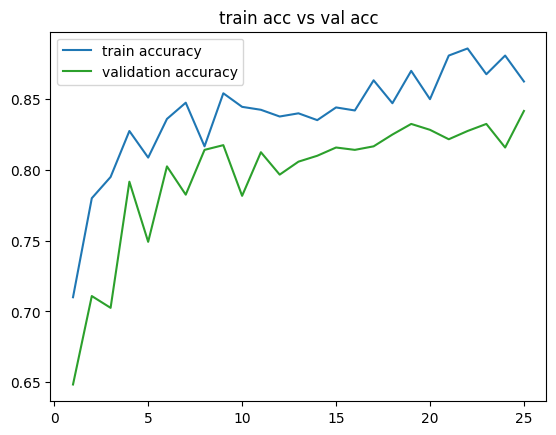

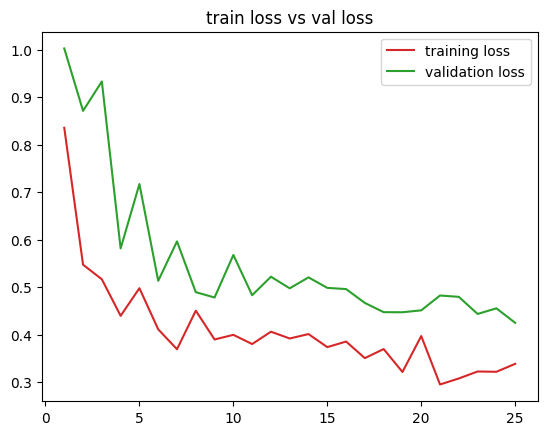

In [45]:
#import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'tab:blue', label='train accuracy')
plt.plot(epochs, val_acc, 'tab:green', label='validation accuracy')
plt.title('train acc vs val acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'tab:red', label='training loss')
plt.plot(epochs, val_loss, 'tab:green', label='validation loss')
plt.title('train loss vs val loss')
plt.legend()

plt.show()

# We load the model
We load the model that was previously saved.

We display the confusion matrix to see the performance of the model.

26/26 [==============================] - 21s 800ms/step


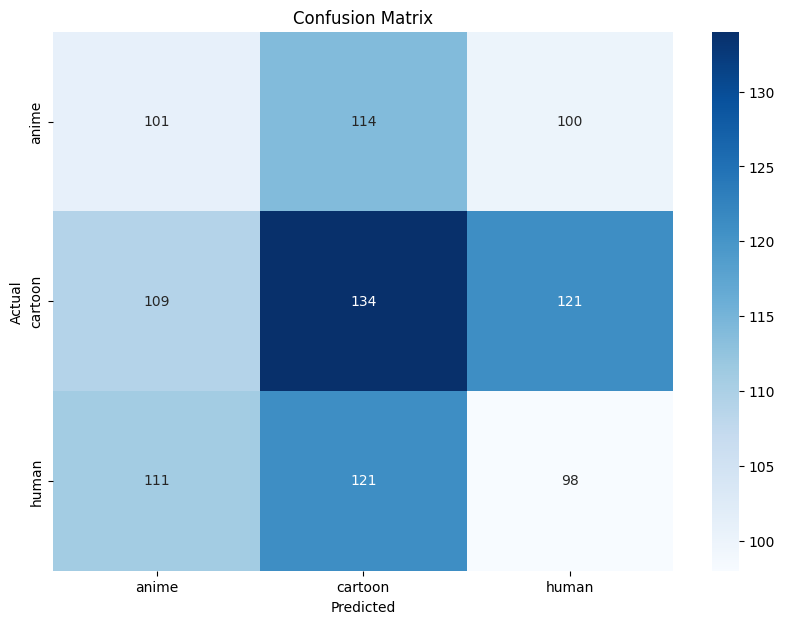

In [46]:
# import numpy as np
# import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

class_labels = list(test_generator.class_indices.keys())

y_pred = model1.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = test_generator.classes

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import load_model
model = model1
# Predictions and confusion matrix

test_generator.reset()
predicted_labels = []
original_labels = []

# Iterate over the test generator to make predictions and store original labels
for i in range(len(test_generator)):
    batch = test_generator[i]
    images, labels = batch
    predictions = model.predict(images)

    # Convert predictions to labels
    batch_predicted_labels = np.argmax(predictions, axis=1)
    labels = np.argmax(labels, axis=1)

    # Append predicted labels to the array
    predicted_labels.extend(batch_predicted_labels)

    # Append original labels to the array
    original_labels.extend(labels)

# Convert lists to numpy arrays
predicted_labels = np.array(predicted_labels)
original_labels = np.array(original_labels)


cm = confusion_matrix(original_labels, predicted_labels)

print(classification_report(original_labels, predicted_labels, target_names = list(test_generator.class_indices.keys()) ))

1/1 [==============================] - 0s 19ms/step
              precision    recall  f1-score   support

       anime       0.77      0.82      0.79       315
     cartoon       0.90      0.88      0.89       364
       human       0.88      0.84      0.86       330

    accuracy                           0.85      1009
   macro avg       0.85      0.85      0.85      1009
weighted avg       0.85      0.85      0.85      1009



In [48]:
model1.save('poke.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
